In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_table("/content/amazonreviews.tsv")
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
df['label'].value_counts()

neg    2562
pos    2202
Name: label, dtype: int64

In [ ]:
df.isnull().sum()

label     0
review    0
dtype: int64

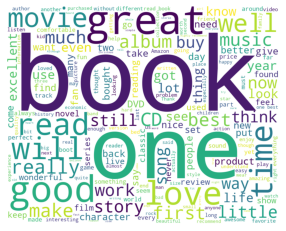

In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width=1000, height=800, background_color='white', min_font_size= 10)
wc.generate(' '.join(df[df['label']=='pos']['review']))
plt.imshow(wc)
plt.axis('off')
plt.show()

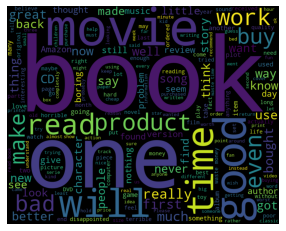

In [ ]:
wc= WordCloud(width=1000, height=800, background_color='black', min_font_size= 10)
wc.generate(' '.join(df[df['label']=='neg']['review']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
import nltk
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemma= WordNetLemmatizer()

In [ ]:
def cleantext(text):
  token= word_tokenize(text.lower())
  ftoken = [t for t in token if(t.isalpha())]
  stop = stopwords.words('english')
  ctoken = [t for t in ftoken if(t not in stop)]
  ltoken = [lemma.lemmatize(t) for t in ctoken]
  return " ".join(ltoken)

In [ ]:
df['review']= df['review'].apply(cleantext)

In [ ]:
df.head

<bound method NDFrame.head of      label                                             review
0      pos  stuning even sound track beautiful paint sener...
1      pos  best soundtrack ever anything reading lot revi...
2      pos  amazing soundtrack favorite music time hand in...
3      pos  excellent soundtrack truly like soundtrack enj...
4      pos  remember pull jaw floor hearing played game kn...
...    ...                                                ...
4759   neg  phone jack faulty loved thing month purchase p...
4760   pos  good price mine month say enjoyed pro price al...
4761   pos  great toy rca player used card decided purchas...
4762   neg  break easily bad warrenty warrenty device mont...
4763   neg  junk junk every time nomad think file corrupt ...

[4764 rows x 2 columns]>

In [ ]:
df[df['label']=='neg'].head()

,label,review
6,neg,buyer beware book want know read paragraph sta...
10,neg,worst complete waste time typographical error ...
13,neg,oh please guess romance novel lover one discer...
14,neg,awful beyond belief feel write keep others was...
15,neg,try fool u fake review glaringly obvious glowi...


In [ ]:
x = df["review"]
y = df['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.2, random_state=10)

In [ ]:
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print(classification_report(ytest,ypred))
  return model

In [ ]:
lr = mymodel(LogisticRegression())

              precision    recall  f1-score   support

         neg       0.84      0.83      0.84       545
         pos       0.78      0.79      0.79       408

    accuracy                           0.82       953
   macro avg       0.81      0.81      0.81       953
weighted avg       0.82      0.82      0.82       953



In [ ]:
svc = mymodel(LinearSVC())

              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       545
         pos       0.76      0.76      0.76       408

    accuracy                           0.80       953
   macro avg       0.79      0.79      0.79       953
weighted avg       0.80      0.80      0.80       953



In [ ]:
bnb = mymodel(BernoulliNB())

              precision    recall  f1-score   support

         neg       0.85      0.85      0.85       545
         pos       0.80      0.80      0.80       408

    accuracy                           0.83       953
   macro avg       0.83      0.83      0.83       953
weighted avg       0.83      0.83      0.83       953



In [ ]:
def checkSentiment(text,model):
  text = cleantext(text)
  newx = cv.transform([text]).toarray()
  pred = model.predict(newx)[0]
  return pred

In [ ]:
posrev1 = "The book was worth reading!"
negrev2 = "It was a total time waste."
negrev3 = "Poor script. Author could have done better."
posrev4 = "It was touching and I loved the plots."

In [ ]:
print(f"{posrev1} -> {checkSentiment(posrev1,lr)}")
print(f"{negrev2} -> {checkSentiment(negrev2,lr)}")
print(f"{negrev3} -> {checkSentiment(negrev3,bnb)}")
print(f"{posrev4} -> {checkSentiment(posrev4,bnb)}")

The book was worth reading! -> pos
It was a total time waste. -> neg
Poor script. Author could have done better. -> neg
It was touching and I loved the plots. -> pos


In [ ]:
pmsg = df["review"][4]
nmsg = df["review"][6]

In [ ]:
print(f'{pmsg[:100]}... -> {checkSentiment(pmsg,lr)}')
print(f'{nmsg[:100]}... -> {checkSentiment(nmsg,bnb)}')

remember pull jaw floor hearing played game know divine music every single song tell story game good... -> pos
buyer beware book want know read paragraph star review must written haddon family friend perhaps ca ... -> neg


In [ ]:
df.head(11)

,label,review
0,pos,stuning even sound track beautiful paint sener...
1,pos,best soundtrack ever anything reading lot revi...
2,pos,amazing soundtrack favorite music time hand in...
3,pos,excellent soundtrack truly like soundtrack enj...
4,pos,remember pull jaw floor hearing played game kn...
5,pos,absolute masterpiece quite sure actually takin...
6,neg,buyer beware book want know read paragraph sta...
7,pos,glorious story loved whisper wicked saint stor...
8,pos,five star book finished reading whisper wicked...
9,pos,whisper wicked saint easy read book made want ...
